In [1]:
import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as plt

In [2]:
#%matplotlib inline
# Set up figure size and DPI for screen demo
#plt.rcParams['figure.figsize'] = (6, 4)
#plt.rcParams['figure.dpi'] = 150

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# interactive plot
## Basic interact usage with integer slider

In [4]:
def f(x):
    plt.plot(np.arange(0, 10), x*np.arange(0,10))
    plt.ylim(-30, 30)
interact(f, x=1)

interactive(children=(IntSlider(value=1, description='x', max=3, min=-1), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

## Range & Step size

In [5]:
interact(f, x=(-3, 3, 0.5))

interactive(children=(FloatSlider(value=0.0, description='x', max=3.0, min=-3.0, step=0.5), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

## Automaticly choose appropriate widget

In [6]:
rands = np.random.rand(100)
def g(x):
    if x:
        plt.plot(rands, 'b')
    else:
        plt.plot(rands, 'r')
interact(g, x=True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.g>

## Interact as a decorator

In [7]:
@interact(x='Title of plot')
def h(x):
    plt.title(x)

interactive(children=(Text(value='Title of plot', description='x'), Output()), _dom_classes=('widget-interact',))

## Multiple widgets and fixed value

In [8]:
def i(x1, x2):
    plt.plot(np.arange(0, 10), x1*np.power(np.arange(0,10), x2))
    plt.title('Power Law: $x=ay^b$')
interact(i, x1=1, x2=fixed(2)) # interact(i, x1=1, x2=3)

interactive(children=(IntSlider(value=1, description='x1', max=3, min=-1), Output()), _dom_classes=('widget-interact',))

<function __main__.i>

## Dropdowns

In [9]:
def j(color):
    plt.plot(np.arange(0, 10), np.power(np.arange(0,10), 5), c=color)
    plt.title('Power Law: $x=ay^b$')
colors = ['red', 'green', 'blue']
interact(j, color=colors)

interactive(children=(Dropdown(description='color', options=('red', 'green', 'blue'), value='red'), Output()), _dom_classes=('widget-interact',))

<function __main__.j>

### Dropdowns with dicts

In [10]:
def k(x2):
    plt.plot(np.arange(0, 10), np.power(np.arange(0, 10), x2))
    plt.title('Power Law: $x=ay^b$')
powers = {'one':1, 'two':2, 'three':3}
interact(k, x2=powers)

interactive(children=(Dropdown(description='x2', options={'one': 1, 'two': 2, 'three': 3}, value=1), Output()), _dom_classes=('widget-interact',))

<function __main__.k>

# More

In [11]:
from IPython.display import display
# nbagg - important for this figure for unknown reason!
%matplotlib nbagg

$A = amplitude$  
$\phi = phase$  
$\nu  = frequency$  
$y = A \sin(2 \pi(\nu x + \phi))$

<IPython.core.display.Javascript object>


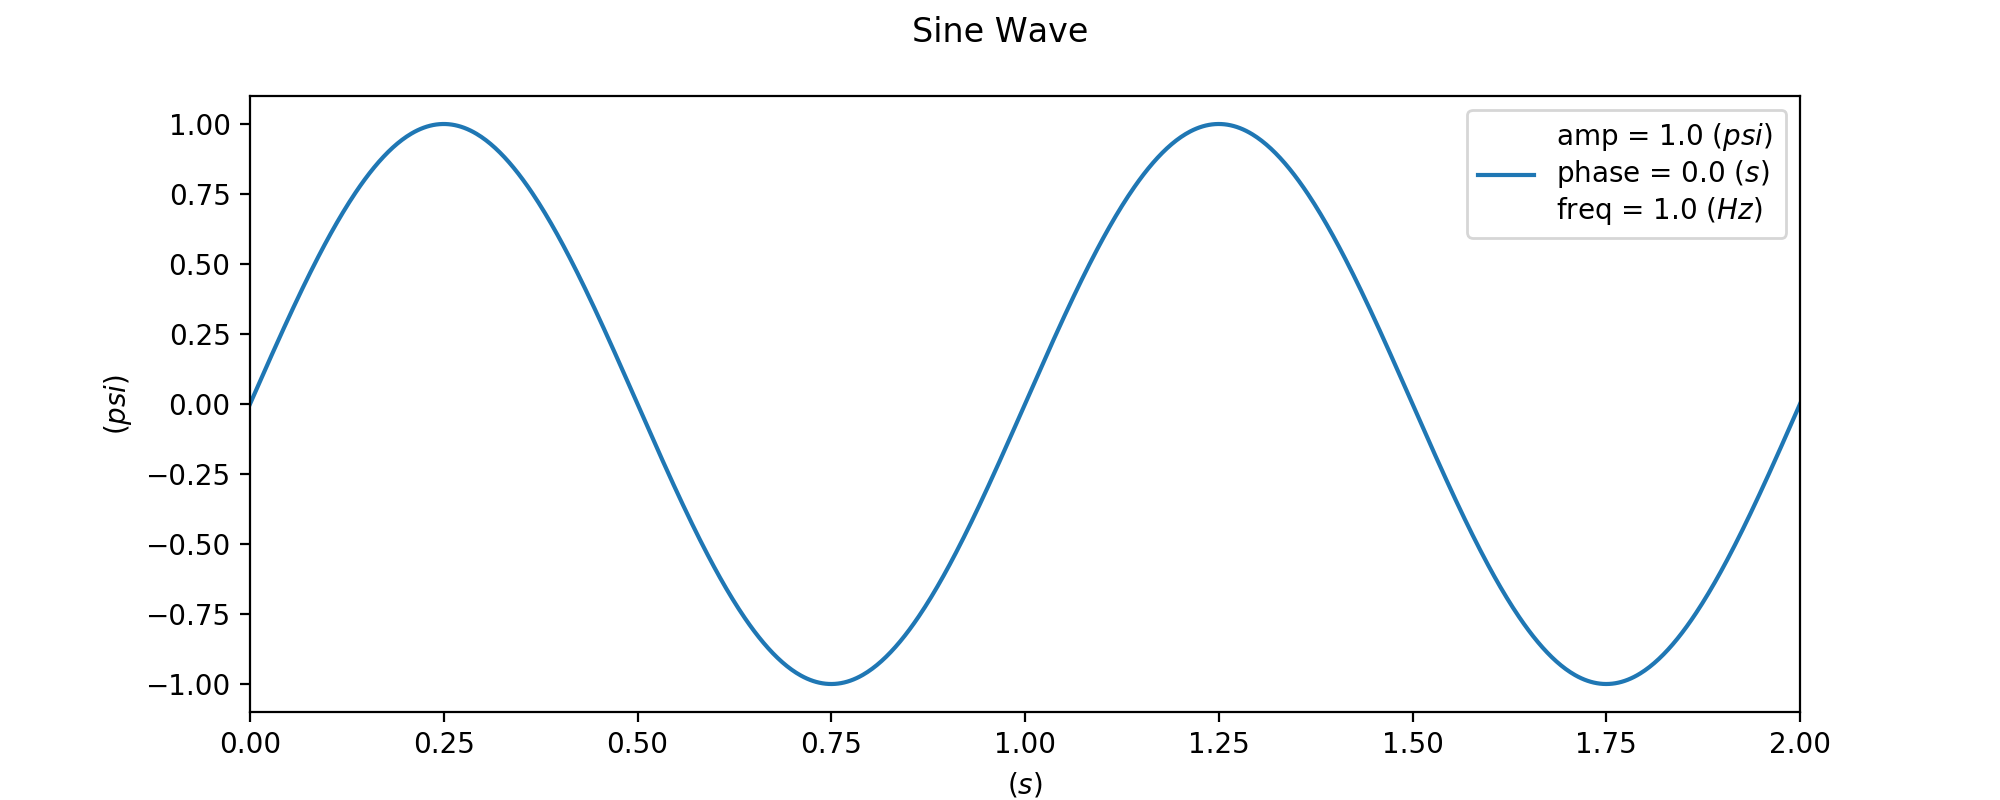

interactive(children=(FloatSlider(value=1.0, description='Amp:', max=10.0, min=1.0), FloatSlider(value=0.0, description='Phase:', max=5.0), FloatSlider(value=1.0, description='Freq:', max=10.0, min=1.0), Output()), _dom_classes=('widget-interact',))

In [14]:
x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10,4))
plt.suptitle('Sine Wave')

def update_plot(amp, phase, freq):
    """
    this function is linked to the sliders and
    it replots the sine wave when the sliders are changed
    """
    ax.clear()
    
    units = 'amp = {} $(psi) $ \nphase = {} $(s)$\nfreq = {} $(Hz)$'
    y = amp * np.sin(2 * np.pi * (freq * x + phase))
    
    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    ax.set_ylabel('$(psi)$')
    ax.set_xlim(x[0], x[-1])
    plt.show()
    
    
amp   = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq  = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')

widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)